In [23]:
import sklearn.ensemble
import sklearn.tree
import sklearn.linear_model
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score


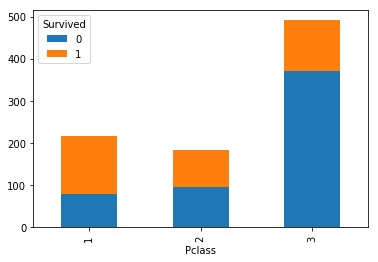

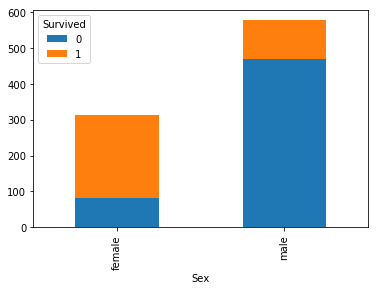

In [24]:
# Laoding Data
ti=pd.read_csv("F:/Analytics/titanic_data.csv")
te=pd.read_csv('F:/Analytics/test_titanic.csv')
#Inspecting data
ti_Class= pd.crosstab(ti['Survived'],ti['Pclass'],margins=True)
ti_sex= pd.crosstab(ti['Sex'],ti['Survived'],margins=True)
ti_Class.T.iloc[:-1,:-1].plot(kind='bar',stacked=True)
ti_sex.iloc[:-1,:-1].plot(kind='bar',stacked=True)
plt.show()

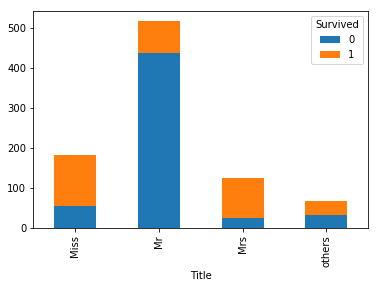

In [25]:
# Preparing new features
dataset=[ti,te]
for data in dataset:
     data['Family']=data['SibSp']+data.Parch
     data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
#Combine catagories with low frequency
freq=ti.Title.value_counts()/ti.shape[0]
cat_to_combine=freq.loc[freq.values<.05].index
for cat in cat_to_combine:
    ti['Title'].replace({cat:'others'},inplace=True)
    te['Title'].replace({cat:'others'},inplace=True)
ti_Title=pd.crosstab(ti['Survived'],ti['Title'],margins=True)
ti_Title.T.iloc[:-1,:-1].plot(kind='bar',stacked=True)
plt.show()

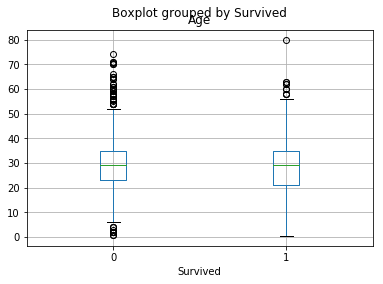

In [26]:
 # fill null
ti['Age'].fillna(int(ti['Age'].mean()),inplace=True)
ti['Embarked'].fillna(ti['Embarked'].mode()[0],inplace=True)
te.Age.fillna(te.Age.mode()[0],inplace=True)
ti.boxplot(column='Age',by='Survived')
plt.show()

In [31]:
te.drop(te[te.Title=='Dona'].index,inplace=True)
te.Title.value_counts()

Mr        239
Miss       78
Mrs        72
others     27
Name: Title, dtype: int64

In [32]:
#Label Encodeing
for i in ['Sex','Embarked','Title']:
    num=preprocessing.LabelEncoder()
    ti[i]=num.fit_transform(ti[i].astype(str))
    te[i]=num.transform(te[i].astype(str))


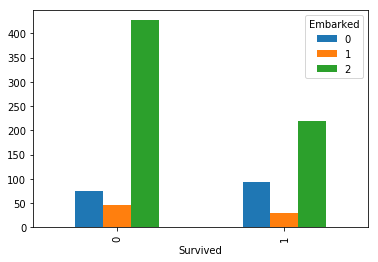

In [37]:
ti_embarked=pd.crosstab(ti['Survived'],ti['Embarked'],margins=False)
ti_embarked.plot(kind='bar',stacked=False)
plt.show()              

In [40]:
predictors=['Pclass','Sex','Age','Embarked','Family','Title']

In [41]:
train=ti[predictors].values
test=ti['Survived'].values
x_test=te[predictors].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,test, test_size=0.3, random_state=0)

In [45]:
# Ensemble modelling
import sklearn.ensemble
model=sklearn.ensemble.RandomForestClassifier()
model.fit(X_train,y_train)
p= model.predict(X_test)

In [46]:
# Analyzing Performance
from sklearn.metrics import confusion_matrix
cnf_mt=confusion_matrix(y_test,p,labels=[1,0])

In [47]:
cnf_mt

array([[ 73,  27],
       [ 27, 141]], dtype=int64)

In [ ]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')

In [ ]:
# Cross validation on accuracy to find best svc parameters
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_